In [1]:
import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
#!cp /content/drive/'My Drive'/JIMUT_MAPS.zip .

In [4]:
#!unzip -qq JIMUT_MAPS.zip

In [5]:
#!mv JIMUT_MAPS/* .

In [2]:
import glob
# roads = glob.glob('roads/*.png')
# print("Total # of files => ",len(roads))
# map = glob.glob('map/*.jpeg')
# print("Total # of files => ",len(map))
roads = glob.glob('JIMUT_TEST/*.jpeg')
print("Total # of files => ",len(roads))

Total # of files =>  50


In [58]:
#!mkdir JIMUT_TEST

In [3]:
# import shutil
# for item in map[:50]:
#   shutil.move(item,'JIMUT_TEST')


In [4]:
# ! zip -r JIMUT_TEST.zip JIMUT_TEST

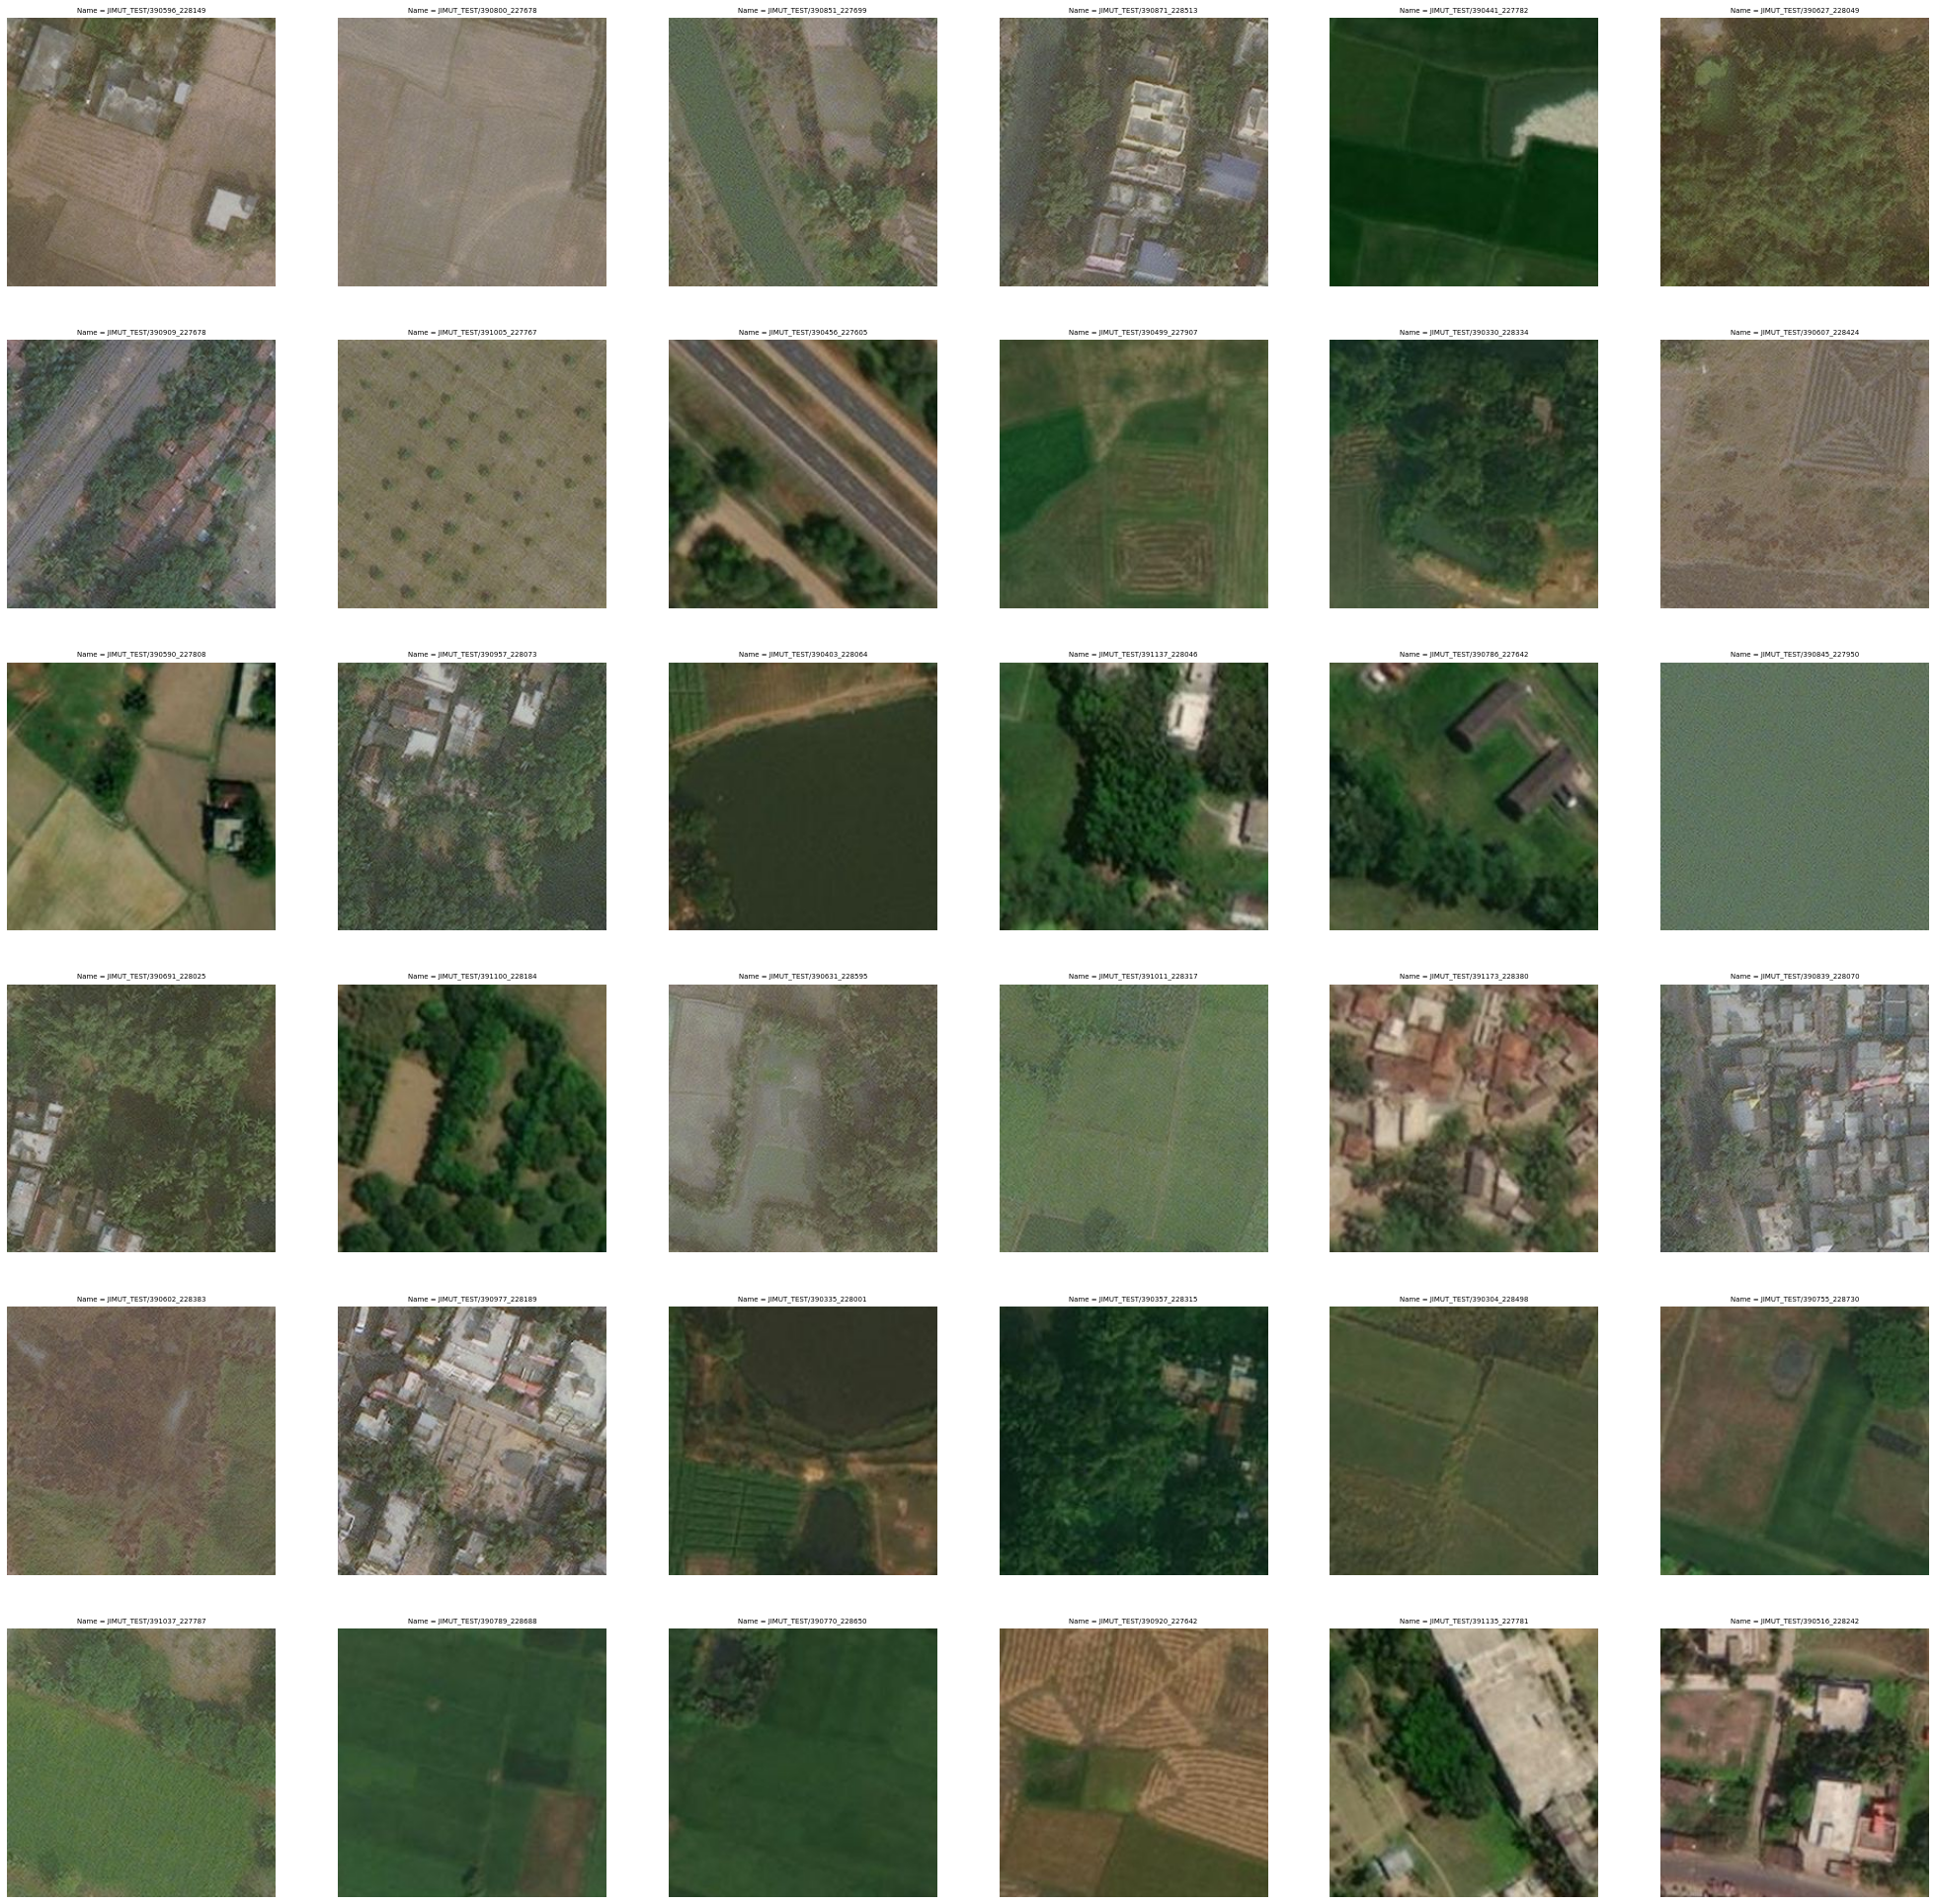

In [5]:
total_img = 36
num_pr = 6 # number per row

counter = 1
plt.figure(figsize=(35,35))
plt.axis('off')
for item in roads[:total_img]:
  image = cv2.imread(item, cv2.IMREAD_UNCHANGED)
  #img = cv2.resize(img, (200,60), interpolation = cv2.INTER_AREA)
  #ret,thresh = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
  # firstly perform erosion
  #erosion = cv2.erode(thresh,kernel,iterations = 1)
  # perform dialation
  #dialate = cv2.dilate(erosion,kernel,iterations = 2)
  
  #print(pred)
  #image_bckup = dialate.copy()
  plt.subplot(num_pr, num_pr, counter)
  #print("item => ",item)
  #print("item => ",str(item.split('_')[1]).split('/')[1])
  plt.title("Name = {}".format(str(item.split('.')[0])),fontsize=7).set_color('black')
  plt.axis('off')
  plt.imshow(image[:,:,::-1])#, cmap=plt.get_cmap('gray'))
  counter += 1
  #break
plt.show()

In [114]:
or_image = cv2.imread(roads[7], cv2.IMREAD_UNCHANGED)

In [115]:
kernel = np.ones((5,5),np.float32)/25
or_image = cv2.filter2D(or_image,-1,kernel)

In [116]:
or_image.shape

(256, 256, 3)

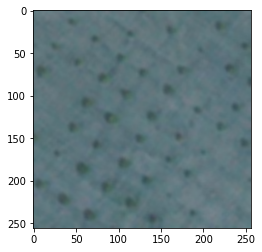

In [117]:
plt.imshow(or_image)

In [118]:
# kernel = np.array([[1, 0, -1],
#                    [1, 0, -1],
#                    [1, 0, -1]])
kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])

kernel_1 = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

kernel_2 = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])

kernel_3 = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]])

# kernel = np.array([[0, 1, 0],
#                    [1, -8, 1],
#                    [0, 1, 0]])

dst = cv2.filter2D(or_image, -1, kernel)
dst_1 = cv2.filter2D(or_image, -1, kernel_1)
dst_2 = cv2.filter2D(or_image, -1, kernel_2)
dst_3 = cv2.filter2D(or_image, -1, kernel_3)

In [119]:
dst.shape

(256, 256, 3)

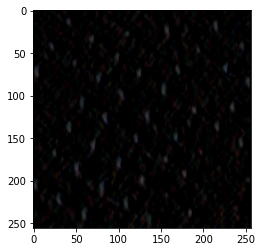

In [120]:
plt.imshow(dst)#, cmap=plt.get_cmap('gray'))

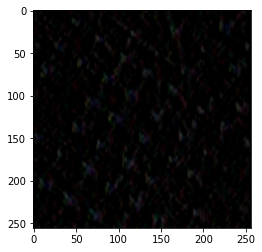

In [121]:
plt.imshow(dst_1)

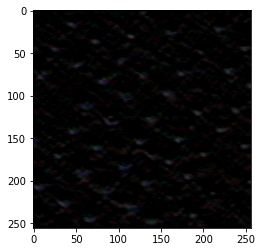

In [122]:
plt.imshow(dst_2)

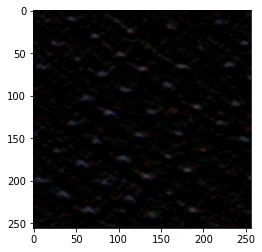

In [123]:
plt.imshow(dst_3)

In [124]:
all_dst = (dst + dst_1 + dst_2 + dst_3) / 255

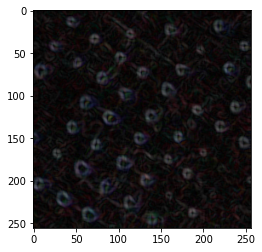

In [125]:
plt.imshow(all_dst)

In [126]:
all_dst.shape

(256, 256, 3)

In [127]:
all_dst.max()

0.43137254901960786

In [128]:
all_dst[:,:,:].shape

(256, 256, 3)

In [129]:
b,g,r = cv2.split(all_dst)
all_dst_gray =  b + g + r 

In [130]:
all_dst_gray.shape

(256, 256)

In [131]:
all_dst_gray

array([[0.        , 0.        , 0.11764706, ..., 0.03137255, 0.04705882,
        0.        ],
       [0.07058824, 0.07058824, 0.18823529, ..., 0.03137255, 0.04705882,
        0.0627451 ],
       [0.07058824, 0.07058824, 0.21176471, ..., 0.07843137, 0.08627451,
        0.0627451 ],
       ...,
       [0.09411765, 0.15686275, 0.16470588, ..., 0.13333333, 0.13333333,
        0.08627451],
       [0.11764706, 0.16470588, 0.15686275, ..., 0.14901961, 0.16470588,
        0.10980392],
       [0.        , 0.05490196, 0.03137255, ..., 0.03137255, 0.05490196,
        0.        ]])

In [132]:
all_dst_gray.max()

1.1529411764705884

In [133]:
all_dst_gray_1 = all_dst_gray

In [134]:
x = [ a for a in range(256)]
y = [ a for a in range(256)]

In [135]:
len(x)

256

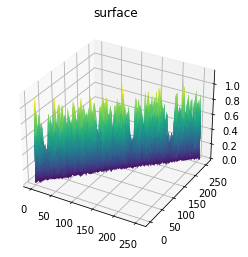

In [136]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np



ax = plt.axes(projection='3d')
ax.plot_surface(x, y, all_dst_gray, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

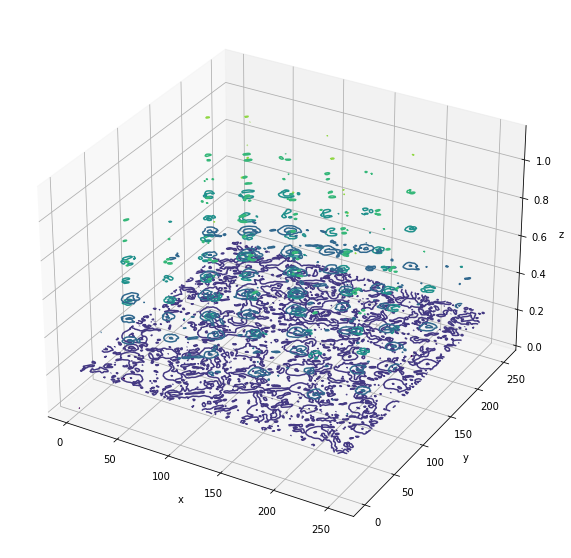

In [139]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.contour3D(x, y, all_dst_gray, 6)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [153]:
or_image

array([[[ 98, 122, 128],
        [ 98, 122, 128],
        [ 98, 122, 128],
        ...,
        [106, 126, 132],
        [106, 127, 133],
        [107, 128, 134]],

       [[ 98, 122, 128],
        [ 97, 121, 127],
        [ 98, 122, 128],
        ...,
        [106, 126, 133],
        [106, 127, 133],
        [106, 127, 133]],

       [[ 97, 121, 127],
        [ 96, 120, 126],
        [ 97, 121, 127],
        ...,
        [107, 127, 133],
        [105, 126, 133],
        [105, 126, 132]],

       ...,

       [[ 83, 110, 119],
        [ 83, 110, 120],
        [ 84, 111, 120],
        ...,
        [ 94, 124, 130],
        [ 93, 124, 130],
        [ 92, 123, 130]],

       [[ 81, 109, 118],
        [ 81, 109, 119],
        [ 82, 110, 119],
        ...,
        [ 95, 126, 132],
        [ 94, 125, 132],
        [ 94, 125, 131]],

       [[ 79, 108, 117],
        [ 80, 108, 118],
        [ 81, 109, 118],
        ...,
        [ 96, 127, 133],
        [ 95, 126, 133],
        [ 94, 126, 132]]

In [169]:
# kernel_LoG = np.array([[0, 1, 0],
#                        [1, -8, 1],
#                        [0, 1, 0]])

kernel_LoG = np.array([[1, 0, -1],
                       [1, 0, -1],
                       [1, 0, -1]])
dst_LoG = cv2.filter2D(or_image, -1, kernel_LoG)

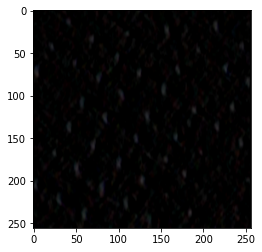

In [170]:
plt.imshow(dst_LoG)
#plt.imshow(or_image)

In [171]:
r, g, b = cv2.split(dst_LoG)
dst_LoG = (r + g + b)/50

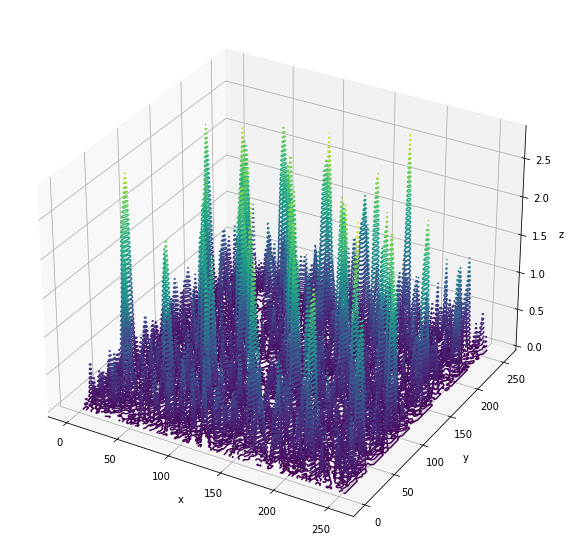

In [172]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.contour3D(x, y, dst_LoG, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');